In [50]:
from osgeo import gdal
import matplotlib.pyplot as plt
import matplotlib.colors

import numpy as np

import glob
import gdal
from scipy.ndimage import zoom

### Critera-Weights Conversion

In [36]:
dataset = gdal.Open('/home/shrayank_mistry/Modules/project-mum-pune/mask.tif', gdal.GA_ReadOnly)
for x in range(1, dataset.RasterCount + 1):
    band = dataset.GetRasterBand(x)
    main_msk = band.ReadAsArray(0)

main_msk = main_msk.T
# main_msk = main_msk[:R, :C]
print(main_msk.shape)

(10500, 8273)


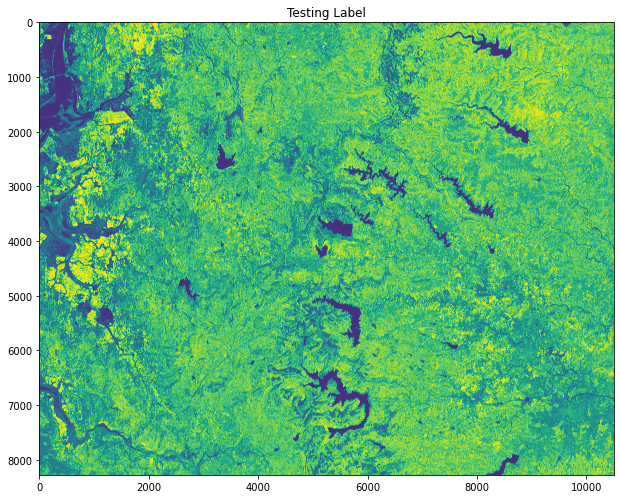

In [37]:
# cm = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#0033cc', '#006600', '#33cc33', '#663300', '#5200cc', '#ffcc00', '#e68a00'])
# cp_main = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#000000', '#0033cc', '#006600', '#33cc33', '#663300', '#5200cc', '#ffcc00', '#e68a00'])

plt.figure(figsize=(35, 25))
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(main_msk.T)

In [39]:
cover_map = np.array(main_msk.T)
cover_map = cover_map.T
print(cover_map.shape)

(10500, 8273)


In [40]:
# classes = {
#     'urban' :  5,
#     'farms' :  6,
#     'dense-forest' : 2,
#     'water' : 1,
#     'fallow' : 7,
#     'sparse-forest' : 3,
#     'barren-land' : 4
# }

classes = {
    0 : 'u-class',
    5 : 'urban',
    6 : 'farms',
    2 : 'dense-forest',
    1 : 'water',
    7 : 'fallow',
    3 : 'sparse-forest',
    4 : 'barren-land'
}

In [41]:
weights = {'urban': 0.29,
 'farms': 0.239,
 'dense-forest': 0.207,
 'water': 0.13,
 'fallow': 0.067,
 'sparse-forest': 0.049,
 'barren-land': 0.019,
 'u-class' : 0.00}

In [42]:
def mapping(p):
    return weights[classes[p]]

In [43]:
map_func = np.vectorize(mapping)
weighted_map = map_func(cover_map)

In [44]:
weighted_map.shape

(10500, 8273)

# DEM (Digital Elevation Model) Loading

In [79]:
dem_ds = gdal.Open('/home/shrayank_mistry/Modules/project-mum-pune/dem_clipped.tif', gdal.GA_ReadOnly)
for x in range(1, dem_ds.RasterCount + 1):
    band = dem_ds.GetRasterBand(x)
    main_msk = band.ReadAsArray(0)

dem = main_msk.T
# main_msk = main_msk[:R, :C]
print(dem.shape)

(3610, 2721)


In [80]:
dem = dem * 3

array([[ 23,  23,  23, ...,  99,  99,  97],
       [ 23,  23,  23, ..., 110, 111, 110],
       [ 22,  22,  21, ..., 118, 118, 116],
       ...,
       [691, 690, 688, ..., 887, 886, 886],
       [691, 690, 688, ..., 886, 887, 888],
       [690, 689, 688, ..., 885, 887, 889]], dtype=int16)

In [81]:
np.unique(dem)

array([ -33,  -30,  -28, ..., 1270, 1271, 1272], dtype=int16)